In [1]:
import numpy as np
import pandas as pd
import os

%load_ext autoreload
%autoreload 2

import shap

/home/deliang@chapman.edu/.conda/envs/general/lib/python3.11/site-packages/shap/utils/_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/deliang@chapman.edu/.conda/envs/general/lib/python3.11/site-packages/shap/utils/_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/deliang@chapman.edu/.conda/envs/general/lib/py

In [2]:
from glob import glob

In [3]:
!pwd

/home/deliang@chapman.edu/Documents/HCP_MEG_fMRI/notebooks


In [4]:
data_path = "/home/deliang@chapman.edu/Documents/HCP_MEG_fMRI/data/Results/rsDenoise/denoise_A/*/*/*/*/allParcels_*_Pearson.txt"
paths = glob(data_path)

In [5]:
counter = 0
vals = np.zeros((148, 148))
for path in paths:
    val = pd.read_csv(paths[0], header=None)
    vals = vals + val
    counter = counter + 1
    
mean_pearson = vals / counter
    

In [6]:
np.fill_diagonal(mean_pearson.values, 0)

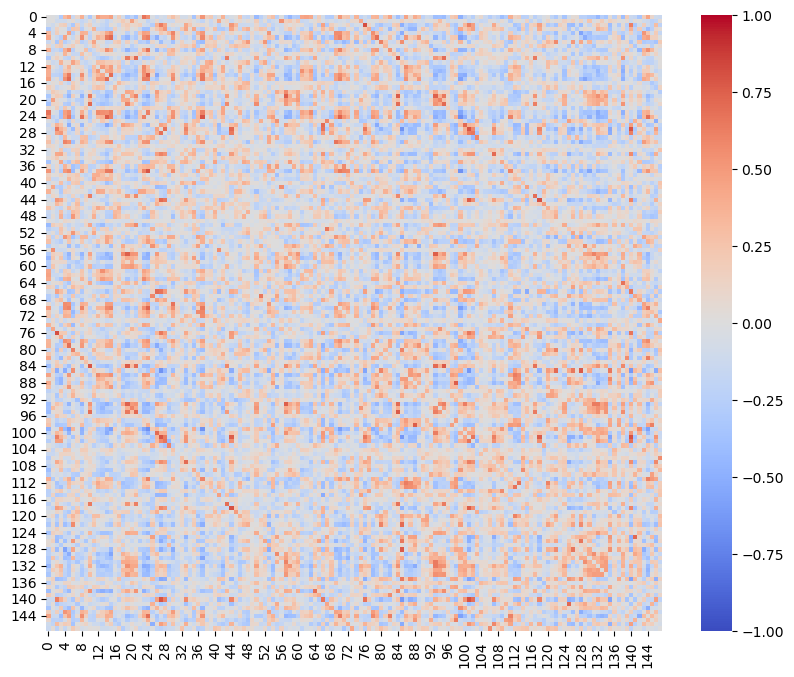

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(mean_pearson.values, fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True, vmin=-1, vmax=1)
plt.show()

In [12]:
# c = struct;
# c(1).frequency_bands = "delta_2-4_Hz";
# c(1).range = [2,4];
# c(2).frequency_bands = "theta_5-7_Hz";
# c(2).range = [5,7];
# c(3).frequency_bands = "alpha_8-12_Hz";
# c(3).range = [8,12];
# c(4).frequency_bands = "beta_15-29_Hz";
# c(4).range = [15,29];
# c(5).frequency_bands = "gamma1_30-59_Hz";
# c(5).range = [30,59];
# c(6).frequency_bands = "gamma2_60-90_Hz";
# c(6).range = [60,90];

In [35]:
results

{'delta_2-4_Hz_AEC': array([[1.        , 0.170801  , 0.17759835, ..., 0.1793702 , 0.17408898,
         0.18078137],
        [0.170801  , 1.        , 0.17581238, ..., 0.20244824, 0.20797576,
         0.19149256],
        [0.17759835, 0.17581238, 1.        , ..., 0.18531119, 0.19327464,
         0.19310078],
        ...,
        [0.1793702 , 0.20244824, 0.18531119, ..., 1.        , 0.4739298 ,
         0.58877055],
        [0.17408898, 0.20797576, 0.19327464, ..., 0.4739298 , 1.        ,
         0.51742878],
        [0.18078137, 0.19149256, 0.19310078, ..., 0.58877055, 0.51742878,
         1.        ]]),
 'delta_2-4_Hz_AECc': array([[0.        , 0.1081489 , 0.11661381, ..., 0.11535259, 0.11273501,
         0.11588937],
        [0.1081489 , 0.        , 0.11347509, ..., 0.11577026, 0.11941   ,
         0.11323119],
        [0.11661381, 0.11347509, 0.        , ..., 0.11970183, 0.1257884 ,
         0.12618091],
        ...,
        [0.11535259, 0.11577026, 0.11970183, ..., 0.        , 0.127

In [37]:
results

{'delta_2-4_Hz_AEC': array([[1.        , 0.170801  , 0.17759835, ..., 0.1793702 , 0.17408898,
         0.18078137],
        [0.170801  , 1.        , 0.17581238, ..., 0.20244824, 0.20797576,
         0.19149256],
        [0.17759835, 0.17581238, 1.        , ..., 0.18531119, 0.19327464,
         0.19310078],
        ...,
        [0.1793702 , 0.20244824, 0.18531119, ..., 1.        , 0.4739298 ,
         0.58877055],
        [0.17408898, 0.20797576, 0.19327464, ..., 0.4739298 , 1.        ,
         0.51742878],
        [0.18078137, 0.19149256, 0.19310078, ..., 0.58877055, 0.51742878,
         1.        ]]),
 'delta_2-4_Hz_AECc': array([[0.        , 0.1081489 , 0.11661381, ..., 0.11535259, 0.11273501,
         0.11588937],
        [0.1081489 , 0.        , 0.11347509, ..., 0.11577026, 0.11941   ,
         0.11323119],
        [0.11661381, 0.11347509, 0.        , ..., 0.11970183, 0.1257884 ,
         0.12618091],
        ...,
        [0.11535259, 0.11577026, 0.11970183, ..., 0.        , 0.127

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

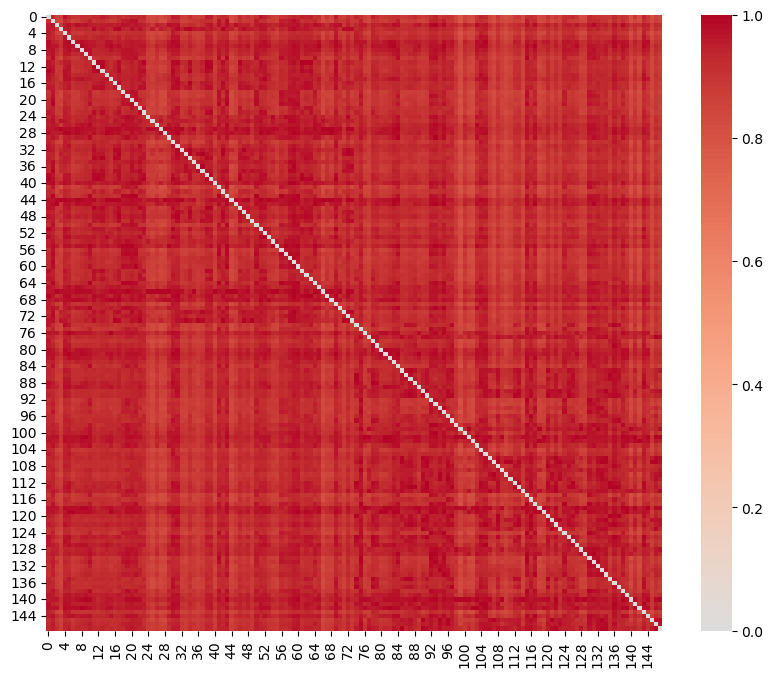

In [49]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(scaler.fit_transform(results['gamma1_30-59_Hz_wPLI']), fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(results['gamma1_30-59_Hz_wPLI'], fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True)
plt.show()

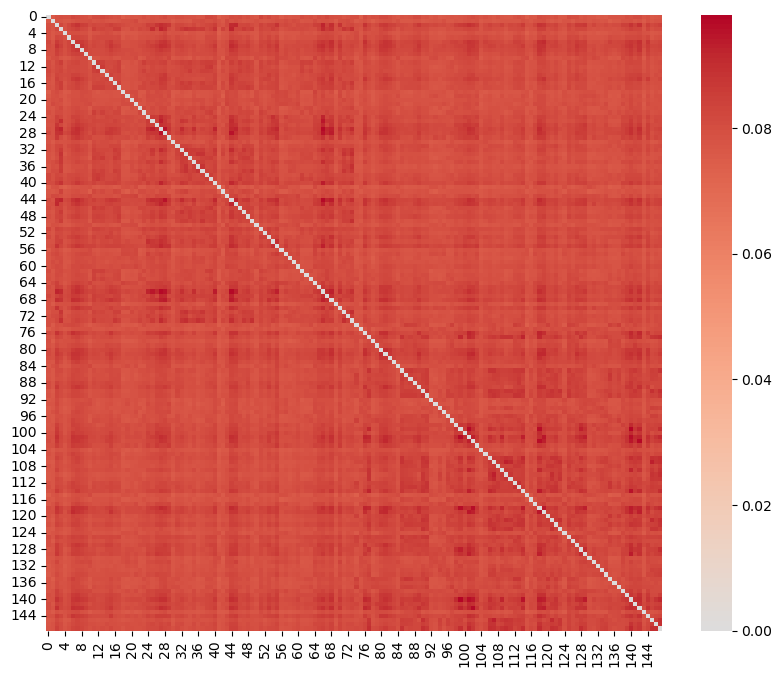

In [50]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(results['gamma1_30-59_Hz_wPLI'], fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True)
plt.show()

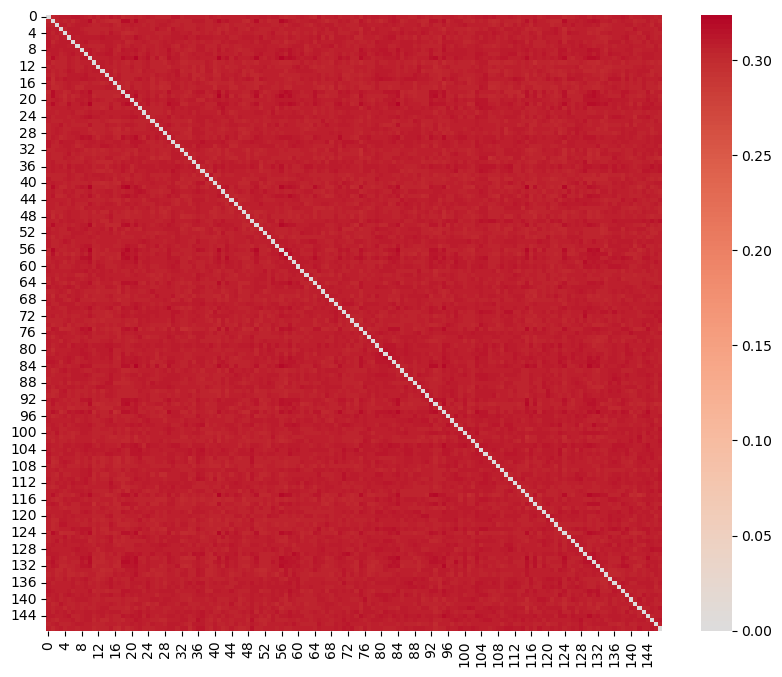

In [51]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(results['delta_2-4_Hz_wPLI'], fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True)
plt.show()

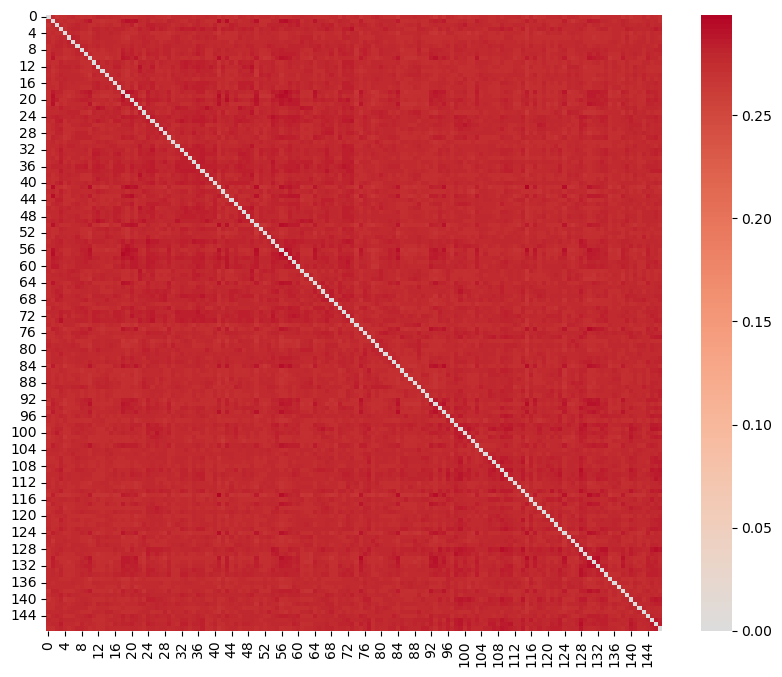

In [52]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(results['theta_5-7_Hz_wPLI'], fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True)
plt.show()

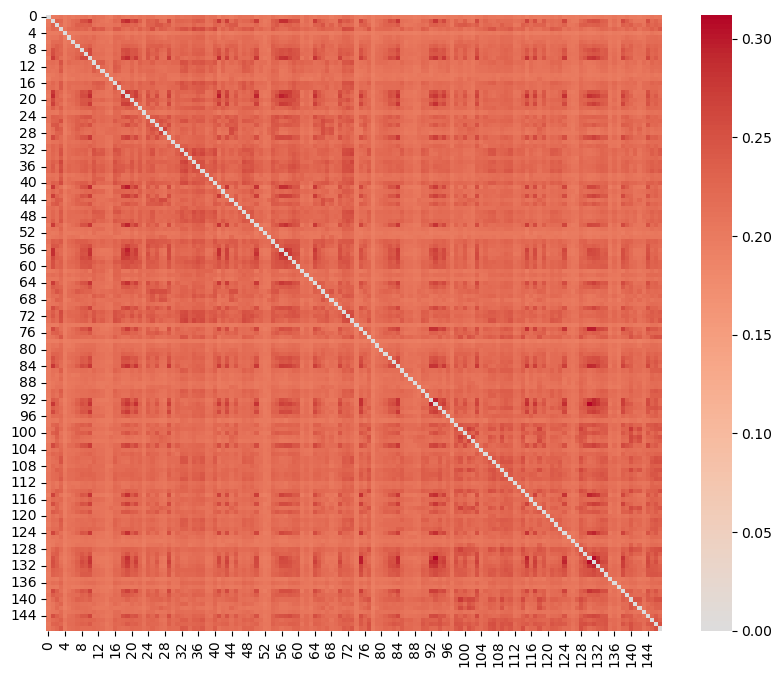

In [51]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(results['alpha_8-12_Hz_wPLI'], fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True)
plt.show()

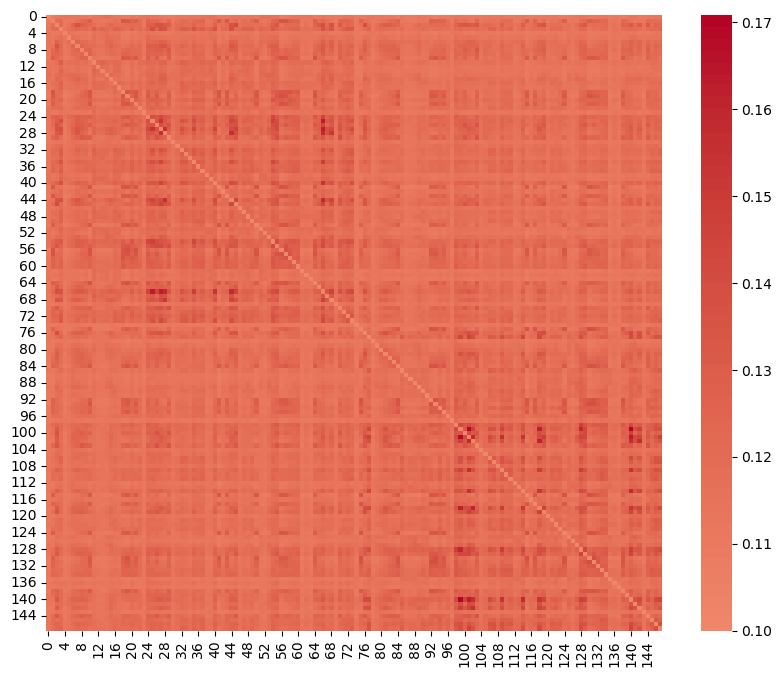

In [70]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(results['beta_15-29_Hz_wPLI'], fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True, vmin=0.1)
plt.show()

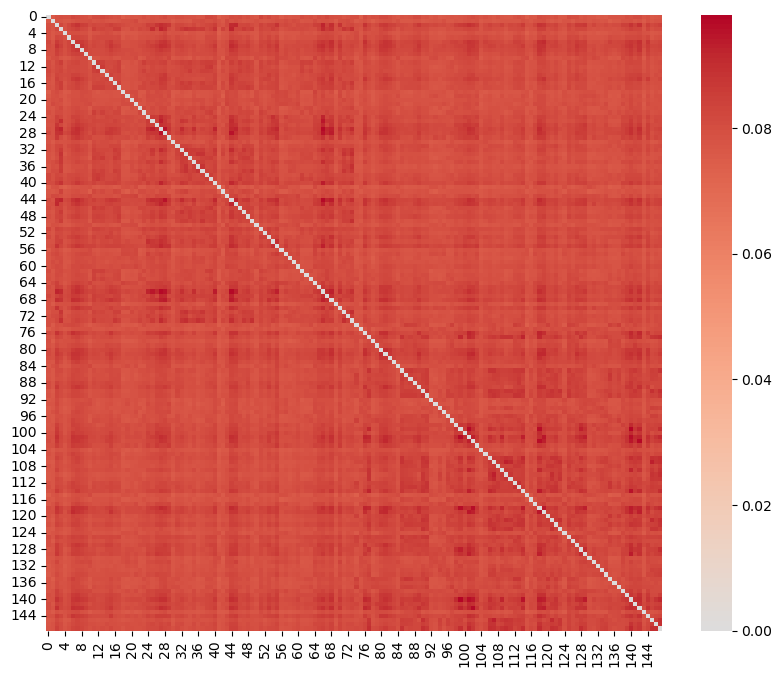

In [60]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(results['gamma1_30-59_Hz_wPLI'], fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True)
plt.show()

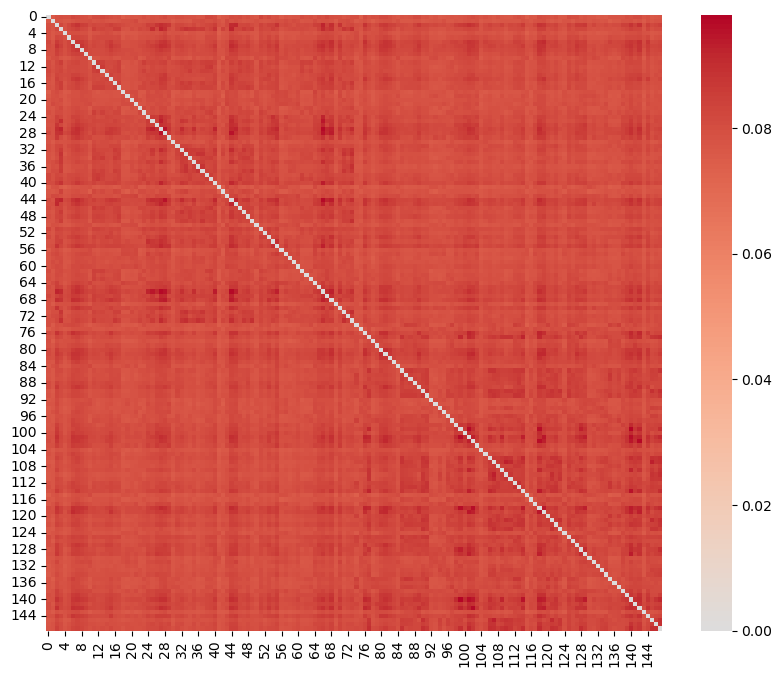

In [76]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(results['gamma1_30-59_Hz_wPLI'], fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True)
plt.show()

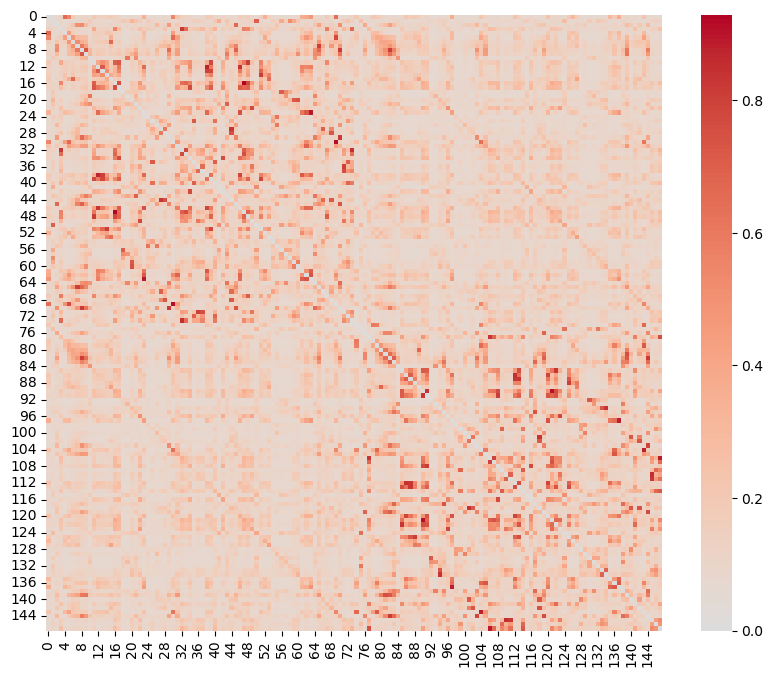

In [77]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(results['gamma1_30-59_Hz_PLV'], fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True)
plt.show()

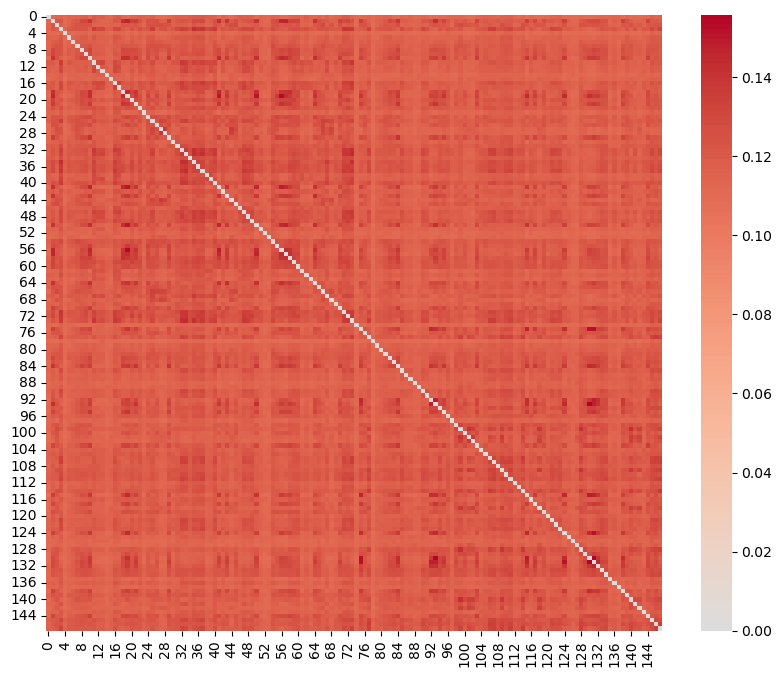

In [86]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(results['alpha_8-12_Hz_PLI'], fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True)
plt.show()

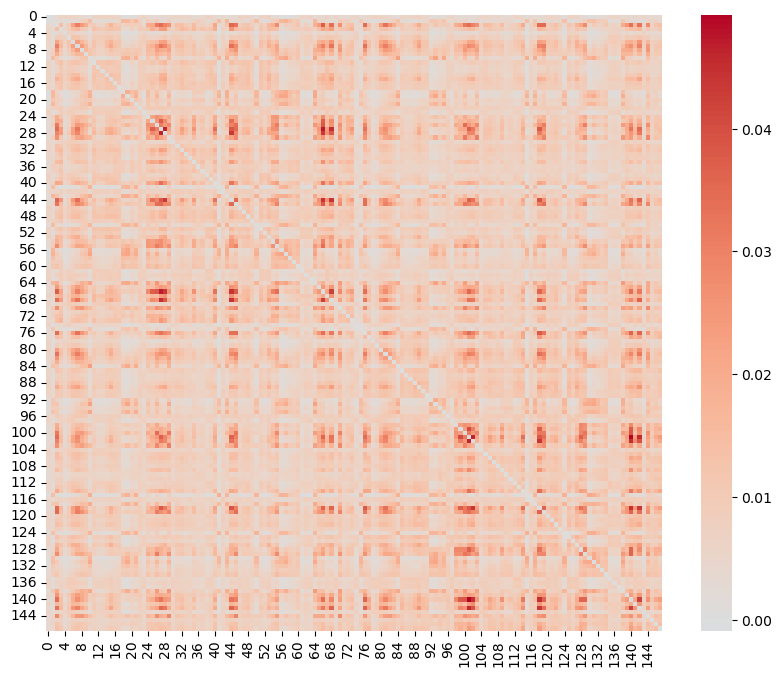

In [78]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(results['gamma1_30-59_Hz_AECc'], fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True)
plt.show()

In [82]:
results['gamma1_30-59_Hz_AEC']

array([[0.        , 0.00519884, 0.00898632, ..., 0.01340686, 0.00913965,
        0.01329822],
       [0.00519884, 0.        , 0.00982006, ..., 0.03122832, 0.03973636,
        0.02368085],
       [0.00898632, 0.00982006, 0.        , ..., 0.01528279, 0.02431849,
        0.02190864],
       ...,
       [0.01340686, 0.03122832, 0.01528279, ..., 0.        , 0.29306164,
        0.40406365],
       [0.00913965, 0.03973636, 0.02431849, ..., 0.29306164, 0.        ,
        0.34320891],
       [0.01329822, 0.02368085, 0.02190864, ..., 0.40406365, 0.34320891,
        0.        ]])

In [81]:
np.fill_diagonal(results['gamma1_30-59_Hz_AEC'],0)

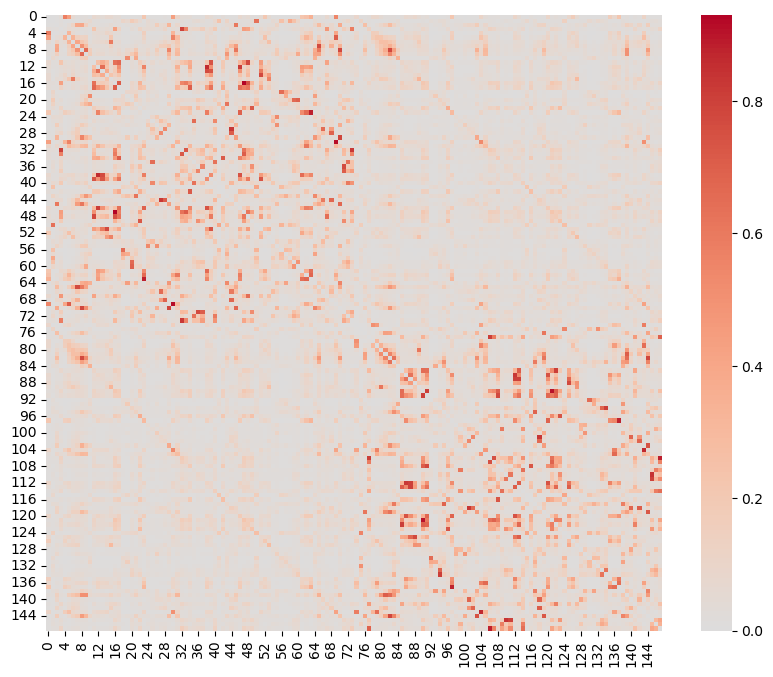

In [83]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(results['gamma1_30-59_Hz_AEC'], fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True)
plt.show()

In [57]:
results.keys()

dict_keys(['delta_2-4_Hz_AEC', 'delta_2-4_Hz_AECc', 'delta_2-4_Hz_PLI', 'delta_2-4_Hz_PLM', 'delta_2-4_Hz_PLV', 'delta_2-4_Hz_wPLI', 'theta_5-7_Hz_AEC', 'theta_5-7_Hz_AECc', 'theta_5-7_Hz_PLI', 'theta_5-7_Hz_PLM', 'theta_5-7_Hz_PLV', 'theta_5-7_Hz_wPLI', 'alpha_8-12_Hz_AEC', 'alpha_8-12_Hz_AECc', 'alpha_8-12_Hz_PLI', 'alpha_8-12_Hz_PLM', 'alpha_8-12_Hz_PLV', 'alpha_8-12_Hz_wPLI', 'beta_15-29_Hz_AEC', 'beta_15-29_Hz_AECc', 'beta_15-29_Hz_PLI', 'beta_15-29_Hz_PLM', 'beta_15-29_Hz_PLV', 'beta_15-29_Hz_wPLI', 'gamma1_30-59_Hz_AEC', 'gamma1_30-59_Hz_AECc', 'gamma1_30-59_Hz_PLI', 'gamma1_30-59_Hz_PLM', 'gamma1_30-59_Hz_PLV', 'gamma1_30-59_Hz_wPLI', 'gamma2_60-90_Hz_AEC', 'gamma2_60-90_Hz_AECc', 'gamma2_60-90_Hz_PLI', 'gamma2_60-90_Hz_PLM', 'gamma2_60-90_Hz_PLV', 'gamma2_60-90_Hz_wPLI', 'pearson_fMRI'])

In [10]:
from scipy.io import loadmat

mat_contents = loadmat('/home/deliang@chapman.edu/Documents/HCP_MEG_fMRI/output/aggregate_results/delta_2-4_Hz_PLV.mat')


In [11]:
mat_contents['PLV']

array([[0.        , 0.2170543 , 0.21633778, ..., 0.22112073, 0.21476616,
        0.22086538],
       [0.2170543 , 0.        , 0.21630209, ..., 0.25274034, 0.25561892,
        0.23922963],
       [0.21633778, 0.21630209, 0.        , ..., 0.21917655, 0.22259341,
        0.21857733],
       ...,
       [0.22112073, 0.25274034, 0.21917655, ..., 0.        , 0.54355221,
        0.64174155],
       [0.21476616, 0.25561892, 0.22259341, ..., 0.54355221, 0.        ,
        0.57806998],
       [0.22086538, 0.23922963, 0.21857733, ..., 0.64174155, 0.57806998,
        0.        ]])

In [12]:
frequencies = ['delta_2-4_Hz', 'theta_5-7_Hz', 'alpha_8-12_Hz', 'beta_15-29_Hz', 'gamma1_30-59_Hz', 'gamma2_60-90_Hz']
methods = ['AEC', 'AECc', 'PLI', 'PLM', 'PLV', 'wPLI']

result_path = "/home/deliang@chapman.edu/Documents/HCP_MEG_fMRI/output/aggregate_results"

results = {}

for freq in frequencies:
    for m in methods:
        name = freq + '_' + m
        file = loadmat(os.path.join(result_path, name + '.mat'))[m]
        results[name] = file

In [13]:
results['pearson_fMRI'] = mean_pearson.values

In [15]:
trius = {}

for key in results.keys():
    flat_mat = results[key][np.triu_indices(results[key].shape[0], k = 1)]
    trius[key] = flat_mat 

In [38]:
trius['pearson_fMRI'] = np.abs(trius['pearson_fMRI'])

In [39]:
corr_m = np.zeros((37,37))
index1 = 0
index2 = 0

for result1 in trius.keys():
    for result2 in trius.keys():
        corf = np.corrcoef(trius[result1], trius[result2])[0,1]
        corr_m[index1, index2] = corf
        index2 = index2 + 1
    index1 = index1 + 1
    index2 = 0

In [14]:
results['delta_2-4_Hz_PLV']

array([[0.        , 0.2170543 , 0.21633778, ..., 0.22112073, 0.21476616,
        0.22086538],
       [0.2170543 , 0.        , 0.21630209, ..., 0.25274034, 0.25561892,
        0.23922963],
       [0.21633778, 0.21630209, 0.        , ..., 0.21917655, 0.22259341,
        0.21857733],
       ...,
       [0.22112073, 0.25274034, 0.21917655, ..., 0.        , 0.54355221,
        0.64174155],
       [0.21476616, 0.25561892, 0.22259341, ..., 0.54355221, 0.        ,
        0.57806998],
       [0.22086538, 0.23922963, 0.21857733, ..., 0.64174155, 0.57806998,
        0.        ]])

In [40]:
np.fill_diagonal(corr_m, 0)

In [87]:
corr_m

array([[ 0.        ,  0.99578224,  0.96860405, ...,  0.4251399 ,
         0.4739074 ,  0.16443962],
       [ 0.99578224,  0.        ,  0.97706896, ...,  0.41455564,
         0.49863018,  0.1663707 ],
       [ 0.96860405,  0.97706896,  0.        , ...,  0.43572268,
         0.47241784,  0.17597264],
       ...,
       [ 0.4251399 ,  0.41455564,  0.43572268, ...,  0.        ,
         0.33123932,  0.14397383],
       [ 0.4739074 ,  0.49863018,  0.47241784, ...,  0.33123932,
         0.        , -0.02223892],
       [ 0.16443962,  0.1663707 ,  0.17597264, ...,  0.14397383,
        -0.02223892,  0.        ]])

array([[0.        , 0.99578224, 0.96860405, ..., 0.34697539, 0.4251399 ,
        0.4739074 ],
       [0.99578224, 0.        , 0.97706896, ..., 0.36643721, 0.41455564,
        0.49863018],
       [0.96860405, 0.97706896, 0.        , ..., 0.4876715 , 0.43572268,
        0.47241784],
       ...,
       [0.34697539, 0.36643721, 0.4876715 , ..., 0.        , 0.64714646,
        0.19610822],
       [0.4251399 , 0.41455564, 0.43572268, ..., 0.64714646, 0.        ,
        0.33123932],
       [0.4739074 , 0.49863018, 0.47241784, ..., 0.19610822, 0.33123932,
        0.        ]])

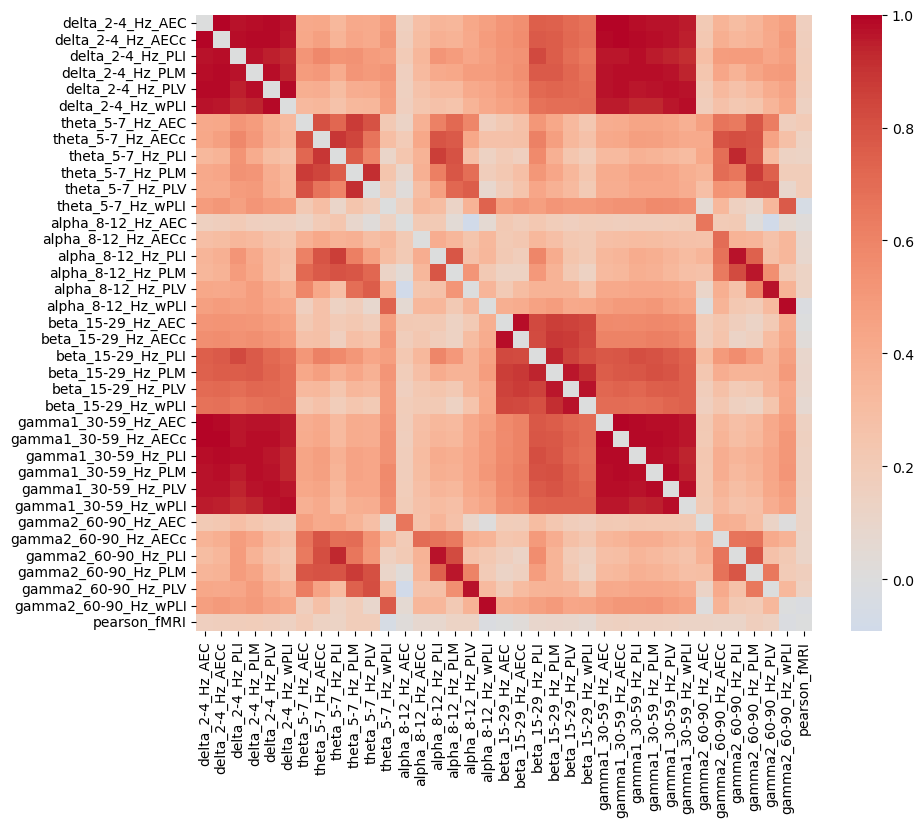

In [88]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(corr_m, xticklabels=results.keys(), yticklabels=results.keys(), fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True, vmax=1,)
plt.show()

In [28]:
all_keys

['delta_2-4_Hz_AEC',
 'theta_5-7_Hz_AEC',
 'alpha_8-12_Hz_AEC',
 'beta_15-29_Hz_AEC',
 'gamma1_30-59_Hz_AEC',
 'gamma2_60-90_Hz_AEC',
 'delta_2-4_Hz_AECc',
 'theta_5-7_Hz_AECc',
 'alpha_8-12_Hz_AECc',
 'beta_15-29_Hz_AECc',
 'gamma1_30-59_Hz_AECc',
 'gamma2_60-90_Hz_AECc',
 'delta_2-4_Hz_PLI',
 'theta_5-7_Hz_PLI',
 'alpha_8-12_Hz_PLI',
 'beta_15-29_Hz_PLI',
 'gamma1_30-59_Hz_PLI',
 'gamma2_60-90_Hz_PLI',
 'delta_2-4_Hz_PLM',
 'theta_5-7_Hz_PLM',
 'alpha_8-12_Hz_PLM',
 'beta_15-29_Hz_PLM',
 'gamma1_30-59_Hz_PLM',
 'gamma2_60-90_Hz_PLM',
 'delta_2-4_Hz_PLV',
 'theta_5-7_Hz_PLV',
 'alpha_8-12_Hz_PLV',
 'beta_15-29_Hz_PLV',
 'gamma1_30-59_Hz_PLV',
 'gamma2_60-90_Hz_PLV',
 'pearson_fMRI',
 'delta_2-4_Hz_wPLI',
 'theta_5-7_Hz_wPLI',
 'alpha_8-12_Hz_wPLI',
 'beta_15-29_Hz_wPLI',
 'gamma1_30-59_Hz_wPLI',
 'gamma2_60-90_Hz_wPLI']

In [91]:
# define the custom key function
def get_suffix(s):
    return s.rsplit("_", 1)[-1]

all_keys = list(trius.keys())

# sort the list using the custom key function
all_keys.sort(key=get_suffix)

all_keys.remove('pearson_fMRI')
all_keys.append('pearson_fMRI')


In [92]:
corr_m = np.zeros((37,37))
index1 = 0
index2 = 0

for result1 in all_keys:
    for result2 in all_keys:
        corf = np.corrcoef(trius[result1], trius[result2])[0,1]
        corr_m[index1, index2] = corf
        index2 = index2 + 1
    index1 = index1 + 1
    index2 = 0

In [93]:
np.fill_diagonal(corr_m, 0)

In [94]:
corr_m_no_fmri = corr_m[:-1, :-1]

In [95]:
all_keys.remove('pearson_fMRI')

In [97]:
new_keys = ['delta (2-4 Hz)', 'theta (5-7 Hz)', 'alpha (8-12 Hz)', 'beta (15-29 Hz)', 'gamma1 (30-59 Hz)', 'gamma2 (60-90 Hz)'] * 6

In [103]:
mask = np.triu(np.ones_like(corr_m_no_fmri, dtype=bool))

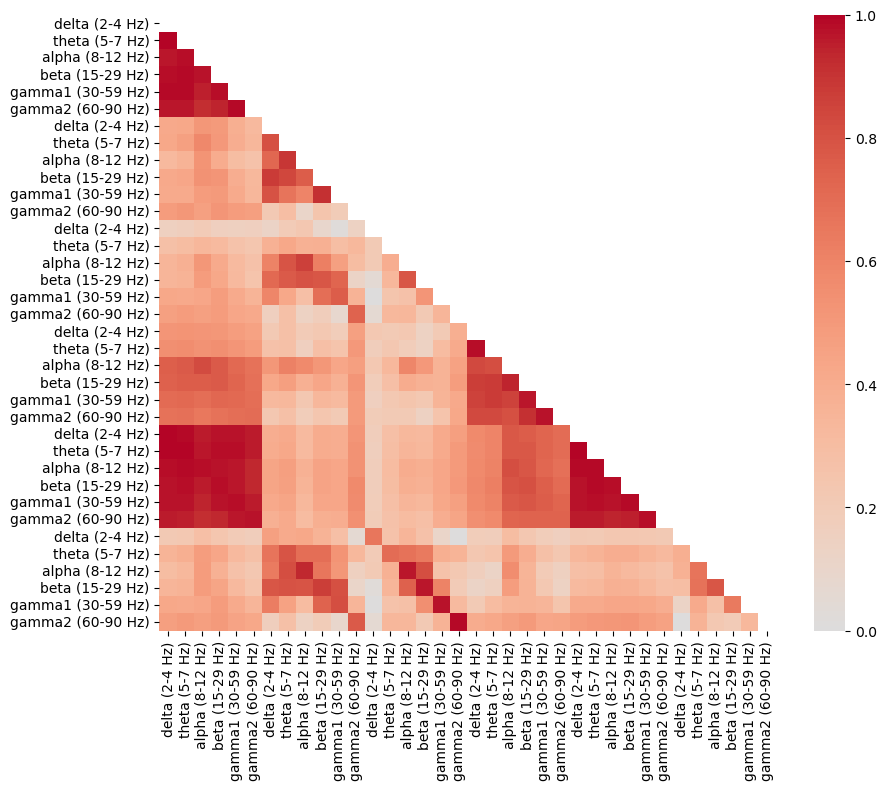

In [104]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(corr_m_no_fmri, mask=mask, xticklabels=new_keys, yticklabels=new_keys, fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True, vmax=1, vmin=0)
plt.show()

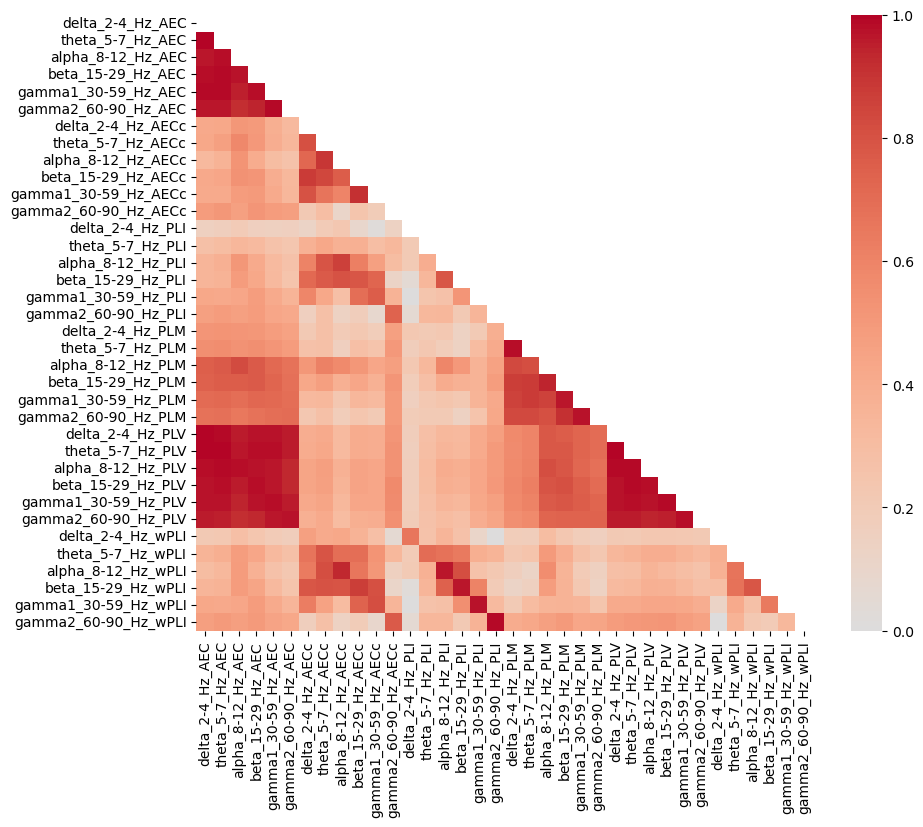

In [105]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
sns.heatmap(corr_m_no_fmri, mask=mask, xticklabels=all_keys, yticklabels=all_keys, fmt=".2f", cmap='coolwarm', center=0, cbar=True, square=True, vmax=1, vmin=0)
plt.show()

In [106]:
corr_fmri = corr_m[-1, :-1]

groups = ['AEC'] * 6 + ['AECc'] * 6 + ['PLI'] * 6 + ['PLM'] * 6 + ['PLV'] * 6 + ['wPLI'] * 6



In [107]:
df = pd.DataFrame({'corr': corr_fmri, 'frequency band': new_keys, 'FC': groups})

In [108]:
df

,corr,frequency band,FC
0,0.164440,delta (2-4 Hz),AEC
1,0.166371,theta (5-7 Hz),AEC
2,0.175973,alpha (8-12 Hz),AEC
3,0.183111,beta (15-29 Hz),AEC
4,0.169393,gamma1 (30-59 Hz),AEC
5,0.147853,gamma2 (60-90 Hz),AEC
6,0.200657,delta (2-4 Hz),AECc
7,0.142513,theta (5-7 Hz),AECc
8,0.129574,alpha (8-12 Hz),AECc
9,0.190559,beta (15-29 Hz),AECc


In [130]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Dummy plot for the legend
figLegend = plt.figure(figsize=(1.5, 1.5))
plt.figlegend(ax.get_legend(), loc='center')

TypeError: 'Legend' object is not iterable

<Figure size 150x150 with 0 Axes>

In [128]:
ax.get_legend()

<Figure size 640x480 with 0 Axes>

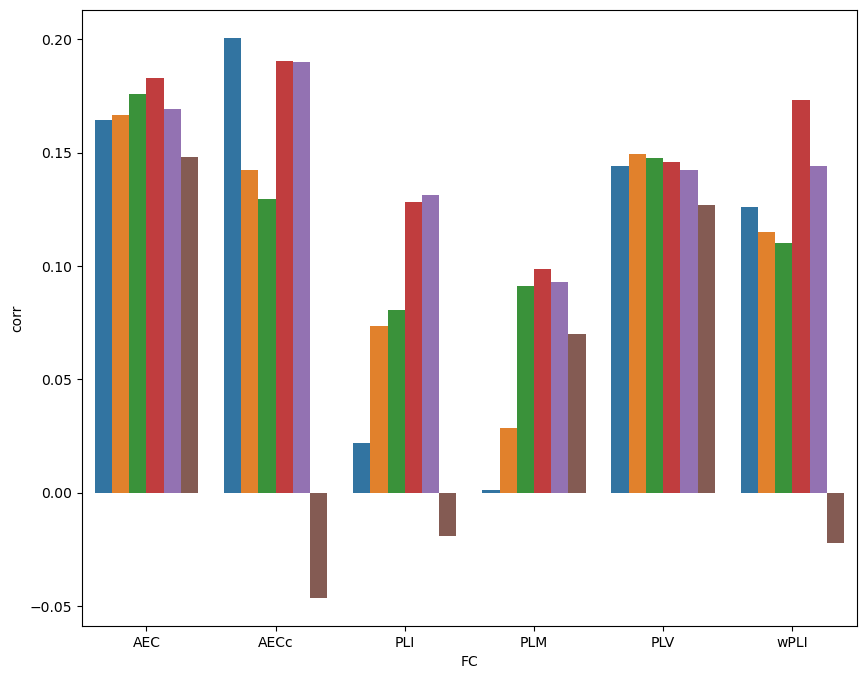

In [138]:
plt.clf()
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
ax = sns.barplot(data=df, x='FC', y='corr', hue='frequency band')
plt.legend().remove()


AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

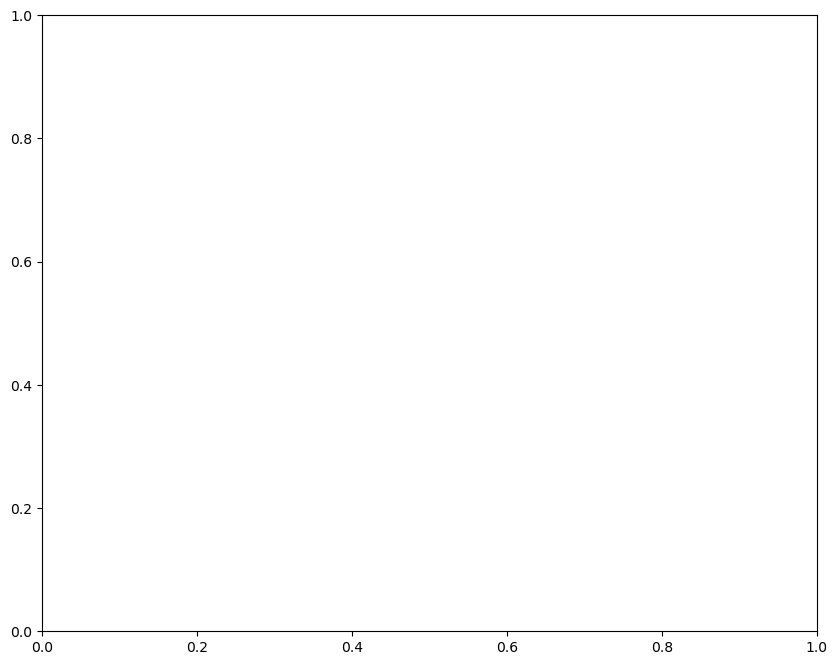

In [134]:
plt.figure(figsize=(10, 8)) # Specify the size of your heatmap
ax = sns.barplot(data=df, x='FC', y='corr', hue='frequency band')

In [20]:
trius = {}

for key in results.keys():
    flat_mat = results[key][np.triu_indices(results[key].shape[0], k = 1)]
    trius[key] = flat_mat 

In [21]:
pearson_fmri = trius['pearson_fMRI']

del trius['pearson_fMRI']

In [22]:
meg_fcs = np.vstack(list(trius.values()))

In [23]:
X_df = pd.DataFrame(meg_fcs.T, columns=trius.keys())

X_df['pearson_fmri'] = pearson_fmri

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# You can run a simple regression model with statsmodels like this:
X_df.columns = X_df.columns.str.replace('-', '_')
predictors = X_df.columns.drop('pearson_fmri')
formula = 'pearson_fmri ~ ' + ' + '.join(predictors)
model = smf.ols(formula = formula, data = X_df)
results_model = model.fit()

# print the summary statistics of the regression model
print(results_model.summary())

                            OLS Regression Results                            
Dep. Variable:           pearson_fmri   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     55.26
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:57:51   Log-Likelihood:                 2037.9
No. Observations:               10878   AIC:                            -4002.
Df Residuals:                   10841   BIC:                            -3732.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.0885 

In [27]:
import shap
import xgboost
from xgboost import cv



In [29]:
X = X_df.drop(['pearson_fmri'], axis=1)
y = X_df['pearson_fmri'].values

d_X = xgboost.DMatrix(X, label=y)

params = {"colsample_bytree": 0.055, 
            "gamma":1.5, 
            "learning_rate":0.02, 
            "max_depth":12, 
            "n_estimators":1000,
            "subsample":0.7, 
            "objective":'reg:linear',
            "booster":'gbtree',
            "reg_alpha":0.0, 
            "eval_metric":'rmse', 
            "silent":1, 
            "random_state":7
}

# Perform cross-validation
num_rounds = 1000
num_folds = 5

cv_results = cv(
    params,
    d_X,
    num_boost_round=num_rounds,
    nfold=num_folds,
    early_stopping_rounds=20,
    metrics='rmse',
    seed=42,
    verbose_eval=True
)

# Print the cross-validation results
print(cv_results)

[11:51:57] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:57] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "n_estimators", "silent" } are not used.

[11:51:57] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:57] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "n_estimators", "silent" } are not used.

[11:51:57] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:57] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "n_estimators", "silent" } are not used.

[11:51:57] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprec

In [43]:
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns


from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

params = {"colsample_bytree": 0.055, 
            "gamma":1.5, 
            "learning_rate":0.02, 
            "max_depth":12, 
            "n_estimators":1000,
            "subsample":0.7, 
            "objective":'reg:linear',
            "booster":'gbtree',
            "reg_alpha":0.0, 
            "eval_metric":'rmse', 
            "silent":1, 
            "random_state":7
}
model = xgboost.train(params, d_train, 1000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

[11:59:54] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[11:59:54] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "n_estimators", "silent" } are not used.

[0]	test-rmse:0.54367
[100]	test-rmse:0.21856
[200]	test-rmse:0.20384
[300]	test-rmse:0.20272
[358]	test-rmse:0.20254


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations